In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [2]:
data = pd.read_csv('시도별 코로나 일일 확진자 현황(전체).csv')

FileNotFoundError: [Errno 2] File 시도별 코로나 일일 확진자 현황(전체).csv does not exist: '시도별 코로나 일일 확진자 현황(전체).csv'

In [3]:
cityCases = data
cityCases = data.rename({'Unnamed: 0':'날짜'}, axis=1)
cityCases['날짜'] = pd.to_datetime(cityCases['날짜'], format='%Y-%m-%d')
cityCases = cityCases.set_index('날짜')
cityCases

,서울,부산,대전,울산,경기,충북,경남
날짜,,,,,,,
2020-01-24,1,0,0,0,0,0,0
2020-01-26,0,0,0,0,1,0,0
2020-01-27,0,0,0,0,1,0,0
2020-01-30,3,0,0,0,0,0,0
2020-01-31,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2020-11-06,37,1,1,1,28,0,5
2020-11-07,54,1,1,0,29,2,10
2020-11-08,46,1,0,0,23,4,4


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0

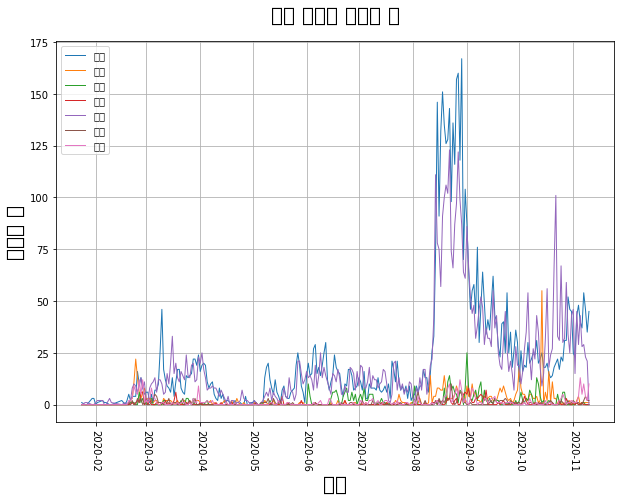

In [4]:
plt.figure(figsize=(10,7))
plt.title('일별 코로나 확진자 수', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(cityCases, linewidth=1)
plt.xlabel('날짜', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('확진자 수', fontweight='bold', fontsize = 20)
plt.xticks(rotation = 270)
plt.legend(['서울','부산','대전','울산','경기','충북','경남'], loc='upper left')
plt.grid(True)     # 격자 표시
plt.show()

In [5]:
cases = pd.read_csv('시도별 코로나 일일 확진자 현황(전체).csv', header=0, index_col=0, squeeze=True)
seoul = cases['서울']
seoul.tail()

2020-11-06    37
2020-11-07    54
2020-11-08    46
2020-11-09    35
2020-11-10    45
Name: 서울, dtype: int64

In [6]:
arima = seoul[:278].astype(np.float)
arima.tail()

2020-11-04    48.0
2020-11-05    40.0
2020-11-06    37.0
2020-11-07    54.0
2020-11-08    46.0
Name: 서울, dtype: float64

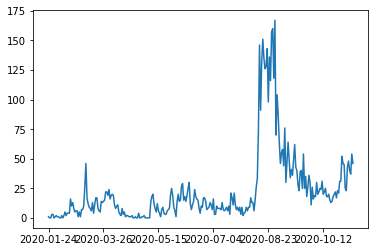

In [7]:
arima.plot()
plt.show()

<Figure size 1440x288 with 0 Axes>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


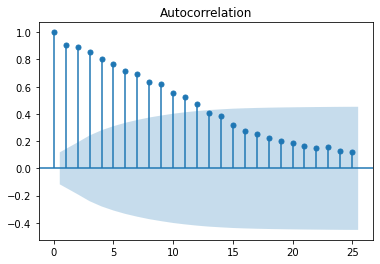

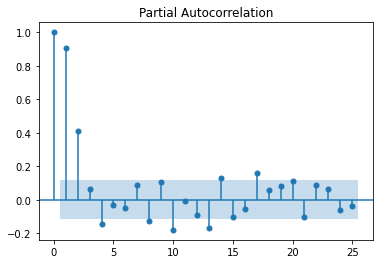

In [8]:
plt.figure(figsize=(20,4))
plot_acf(arima)
plot_pacf(arima)
plt.show()

In [9]:
model = ARIMA(arima, order=(1,1,0))
model_fit = model.fit(trend = 'c', full_output = True, disp=1)
model_fit.summary()

/root/anaconda3/envs/keras/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.서울   No. Observations:                  277
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1088.215
Method:                       css-mle   S.D. of innovations             12.296
Date:                Sat, 14 Nov 2020   AIC                           2182.429
Time:                        17:04:00   BIC                           2193.301
Sample:                             1   HQIC                          2186.791
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1727      0.514      0.336      0.737      -0.836       1.181
ar.L1.D.서울    -0.4376      0.054     -8.121      0.000      -0.543      -0.332
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2853           +0.0000j            2.2853            0.5000
-----------------------------------------------------------------------------
"""

In [10]:
model = ARIMA(arima, order=(1,1,0))
model_fit = model.fit(trend = 'nc', full_output = True, disp=1)
model_fit.summary()

/root/anaconda3/envs/keras/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.서울   No. Observations:                  277
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1088.271
Method:                       css-mle   S.D. of innovations             12.298
Date:                Sat, 14 Nov 2020   AIC                           2180.542
Time:                        17:04:10   BIC                           2187.790
Sample:                             1   HQIC                          2183.450
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.서울    -0.4373      0.054     -8.115      0.000      -0.543      -0.332
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2867           +0.0000j            2.2867            0.5000
-----------------------------------------------------------------------------
"""

/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0, flags=flags)
/root/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0, flags=flags)


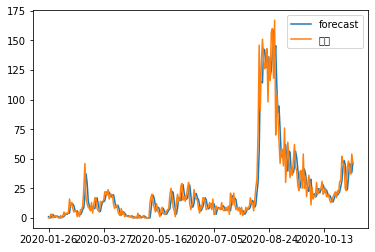

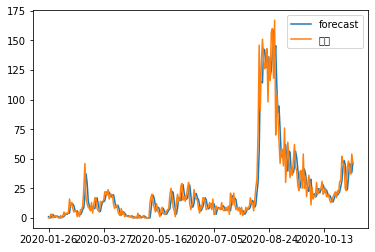

In [11]:
model_fit.plot_predict()

In [12]:
result = model_fit.forecast(steps = 2)
print(result)

(array([49.49850894, 47.96856334]), array([12.29821411, 14.11144893]), array([[25.3944522 , 73.60256567],
       [20.31063166, 75.62649502]]))


In [33]:
from fbprophet import Prophet as proph

In [34]:
corona_seoul = data.iloc[:,0:2]

In [35]:
corona_seoul.columns = ['ds','y']

In [36]:
corona_seoul

,ds,y
0,2020-01-24,1
1,2020-01-26,0
2,2020-01-27,0
3,2020-01-30,3
4,2020-01-31,3
...,...,...
275,2020-11-06,37
276,2020-11-07,54
277,2020-11-08,46
278,2020-11-09,35


In [37]:
corona_seoul_prophet = proph(changepoint_prior_scale=0.15)
corona_seoul_prophet.fit(corona_seoul)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
corona_seoul_forecast = \
corona_seoul_prophet.make_future_dataframe(periods=9, freq='D')

In [43]:
corona_seoul_forecast = corona_seoul_prophet.predict(corona_seoul_forecast)

In [44]:
corona_seoul_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-24,5.062352,-23.182908,33.138820,5.062352,5.062352,-0.096357,-0.096357,-0.096357,-0.096357,-0.096357,-0.096357,0.0,0.0,0.0,4.965994
1,2020-01-26,5.139648,-26.130923,29.563984,5.139648,5.139648,-4.847779,-4.847779,-4.847779,-4.847779,-4.847779,-4.847779,0.0,0.0,0.0,0.291869
2,2020-01-27,5.178296,-22.857782,30.775830,5.178296,5.178296,-0.610524,-0.610524,-0.610524,-0.610524,-0.610524,-0.610524,0.0,0.0,0.0,4.567772
3,2020-01-30,5.294240,-20.998308,35.842247,5.294240,5.294240,0.934798,0.934798,0.934798,0.934798,0.934798,0.934798,0.0,0.0,0.0,6.229037
4,2020-01-31,5.332888,-24.538512,32.606068,5.332888,5.332888,-0.096357,-0.096357,-0.096357,-0.096357,-0.096357,-0.096357,0.0,0.0,0.0,5.236530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2020-11-15,14.553409,-18.013954,37.941598,14.466261,14.715579,-4.847779,-4.847779,-4.847779,-4.847779,-4.847779,-4.847779,0.0,0.0,0.0,9.705630
285,2020-11-16,13.914161,-15.573479,41.093212,13.733586,14.185699,-0.610524,-0.610524,-0.610524,-0.610524,-0.610524,-0.610524,0.0,0.0,0.0,13.303638
286,2020-11-17,13.274914,-12.154075,44.349695,12.983389,13.660584,1.507789,1.507789,1.507789,1.507789,1.507789,1.507789,0.0,0.0,0.0,14.782702
287,2020-11-18,12.635666,-14.741217,41.885864,12.239936,13.179575,0.350831,0.350831,0.350831,0.350831,0.350831,0.350831,0.0,0.0,0.0,12.986497


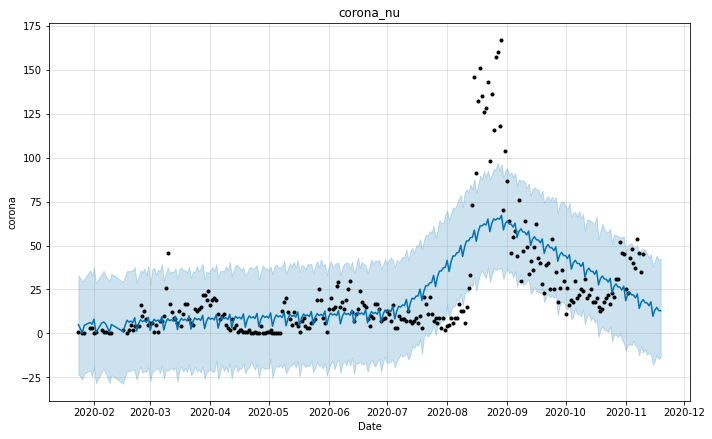

In [45]:
corona_seoul_prophet.plot(corona_seoul_forecast, xlabel = 'Date', ylabel = 'corona')
plt.title('corona_nu');

In [46]:
corona_seoul_prophet.changepoints
corona_seoul_changepoints = [str(date)[0:10] for date in corona_seoul_prophet.changepoints]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Corona and Changepoints')

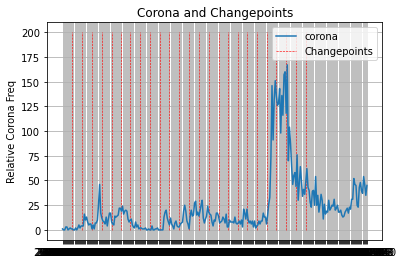

In [47]:
plt.plot(corona_seoul.ds, corona_seoul.y, label = 'corona')
plt.vlines(corona_seoul_changepoints, ymin = 0, ymax= 200, colors = 'r', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')
plt.grid('off'); plt.ylabel('Relative Corona Freq')
plt.legend()
plt.title('Corona and Changepoints')


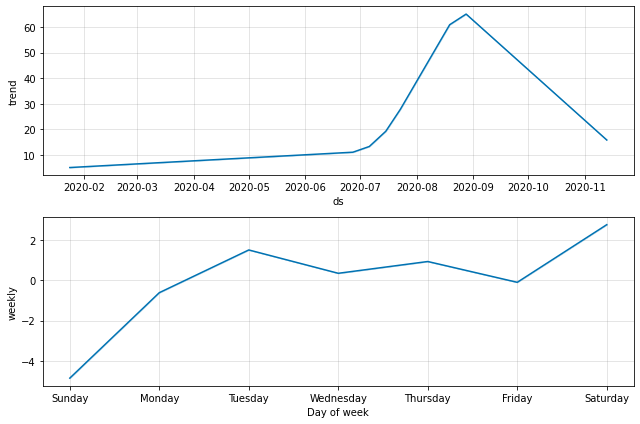

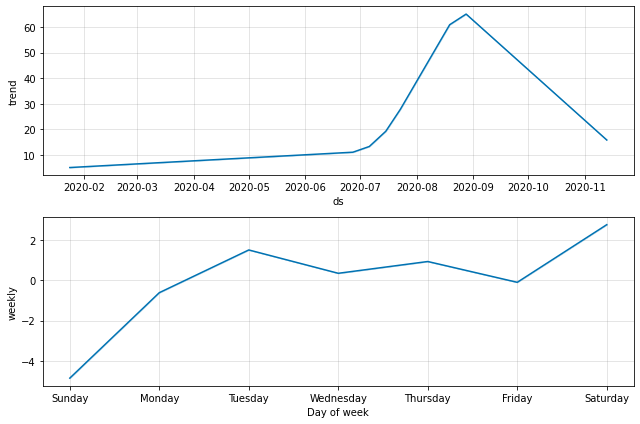

In [82]:
corona_seoul_prophet.plot_components(corona_seoul_forecast)